<a href="https://colab.research.google.com/github/yananma/5_programs_per_day/blob/master/0507.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## softmax 回归

In [0]:
# pip install mxnet d2lzh 

In [0]:
import mxnet 
from mxnet import nd 

In [8]:
X = nd.arange(12).reshape((3, 4))
X


[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]
<NDArray 3x4 @cpu(0)>

In [9]:
X.sum()


[66.]
<NDArray 1 @cpu(0)>

In [11]:
X.norm()


[22.494442]
<NDArray 1 @cpu(0)>

In [17]:
sum = 0
for x in range(12):
    # print((x**2))
    sum += x**2 
print(sum)

506


In [25]:
X**2


[[  0.   1.   4.   9.]
 [ 16.  25.  36.  49.]
 [ 64.  81. 100. 121.]]
<NDArray 3x4 @cpu(0)>

In [19]:
(X**2).sum()


[506.]
<NDArray 1 @cpu(0)>

In [24]:
nd.sqrt((X**2).sum())


[22.494444]
<NDArray 1 @cpu(0)>

## 3.5 图像分类数据集 ( Fashion-MNIST )

In [0]:
%matplotlib inline 
import d2lzh as d2l 
from mxnet.gluon import data as gdata 
import sys 
import time 

In [27]:
mnist_train = gdata.vision.FashionMNIST(train=True)
mnist_test = gdata.vision.FashionMNIST(train=False)

In [28]:
len(mnist_train)

60000

In [29]:
len(mnist_test)

10000

In [0]:
feature, label = mnist_train[0]

In [31]:
feature.shape

(28, 28, 1)

In [32]:
feature.dtype

numpy.uint8

In [33]:
label

2

In [34]:
label.shape

()

In [35]:
label.dtype

dtype('int32')

In [36]:
type(label)

numpy.int32

In [0]:
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 
            'sandal', 'shirt', 'sneaker', 'bsg', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [43]:
text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 
            'sandal', 'shirt', 'sneaker', 'bsg', 'ankle boot']
labels_text = [3, 5, 7]
[text_labels[int(i)] for i in labels_text]

['dress', 'sandal', 'sneaker']

In [0]:
def show_fashion_mnist(images, labels):
    d2l.use_svg_display()
    _, figs = d2l.plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.reshape((28, 28)).asnumpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)

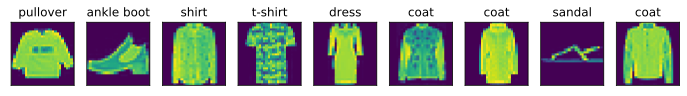

In [61]:
X, y = mnist_train[0:9]
show_fashion_mnist(X, get_fashion_mnist_labels(y))

In [0]:
batch_size = 256
transformer = gdata.vision.transforms.ToTensor()
num_workers = 16

train_iter = gdata.DataLoader(mnist_train.transform_first(transformer), batch_size, shuffle=True, num_workers=num_workers)
test_iter = gdata.DataLoader(mnist_test.transform_first(transformer), batch_size, shuffle=False, num_workers=num_workers)

In [88]:
start = time.time()
for X, y in train_iter:
    continue 
'%.2f sec' % (time.time() - start)

'5.30 sec'

## 3.6 softmax 回归的从零开始实现

In [0]:
%matplotlib inline 
import d2lzh as d2l 
from mxnet import autograd, nd 

In [0]:
batch_size = 256 
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [0]:
num_inputs = 784 
num_outputs = 10 

W = nd.random.normal(scale=0.01, shape=(num_inputs, num_outputs))
b = nd.zeros(num_outputs)

In [0]:
W.attach_grad()
b.attach_grad()

In [214]:
X = nd.array([[1, 2, 3], [4, 5, 6]])
print(X)
X.sum(axis=0, keepdims=True)


[[1. 2. 3.]
 [4. 5. 6.]]
<NDArray 2x3 @cpu(0)>



[[5. 7. 9.]]
<NDArray 1x3 @cpu(0)>

In [215]:
X, X.sum(axis=1, keepdims=True)

(
 [[1. 2. 3.]
  [4. 5. 6.]]
 <NDArray 2x3 @cpu(0)>, 
 [[ 6.]
  [15.]]
 <NDArray 2x1 @cpu(0)>)

In [0]:
def softmax(X):
    X_exp = X.exp()
    partition = X_exp.sum(axis=1, keepdims=True)
    return X_exp / partition 

In [217]:
X = nd.random.normal(shape=(2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(axis=1)

(
 [[0.7280542  0.07550384 0.08915064 0.09968377 0.00760758]
  [0.24716635 0.08726549 0.17607024 0.2635011  0.22599685]]
 <NDArray 2x5 @cpu(0)>, 
 [1. 1.]
 <NDArray 2 @cpu(0)>)

In [0]:
def net(X):
    return softmax(nd.dot(X.reshape((-1, num_inputs)), W) + b)

In [219]:
y_hat = nd.array([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y = nd.array([0, 2], dtype='int32')
nd.pick(y_hat, y)


[0.1 0.5]
<NDArray 2 @cpu(0)>

In [0]:
def cross_entropy(y_hat, y):
    return -nd.pick(y_hat, y).log()

In [0]:
def accuracy(y_hat, y):
    return (y_hat.argmax(axis=1) == y.astype('float32')).mean().asscalar()

In [222]:
accuracy(y_hat, y)

0.5

In [0]:
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0 
    for X, y in data_iter:
        y = y.astype('float32')
        acc_sum += (net(X).argmax(axis=1) == y).sum().asscalar()
        n += y.size 
    return acc_sum / n 

In [228]:
evaluate_accuracy(test_iter, net)

0.0992

In [0]:
num_epochs, lr = 5, 0.1 

def train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params=None, lr=None, trainer=None):
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
        for X, y in train_iter:
            with autograd.record():
                y_hat = net(X)
                l = loss(y_hat, y).sum()
            l.backward()
            if trainer is None:
                d2l.sgd(params, lr, batch_size)
            else:
                trainer.step(batch_size)
            y = y.astype('float32')
            train_l_sum += l.asscalar()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().asscalar()
            n += y.size 
        test_acc = evaluate_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f' 
          % (epoch+1, train_l_sum / n, train_acc_sum / n, test_acc))

In [232]:
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, batch_size, [W, b], lr)

epoch 1, loss 0.4781, train acc 0.838, test acc 0.844
epoch 2, loss 0.4685, train acc 0.840, test acc 0.841
epoch 3, loss 0.4621, train acc 0.842, test acc 0.842
epoch 4, loss 0.4558, train acc 0.845, test acc 0.846
epoch 5, loss 0.4515, train acc 0.846, test acc 0.847


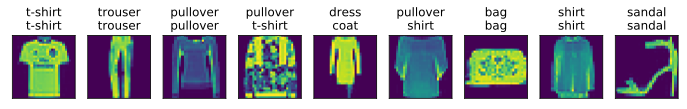

In [233]:
for X, y in test_iter:
    break 

true_labels = d2l.get_fashion_mnist_labels(y.asnumpy())
pred_labels = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1).asnumpy())
titles = [true + '\n' + pred for true, pred in zip(true_labels, pred_labels)]
d2l.show_fashion_mnist(X[0:9], titles[0:9])

## 书上原版

In [0]:
%matplotlib inline
import d2lzh as d2l
from mxnet import autograd, nd

In [0]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [0]:
num_inputs = 784
num_outputs = 10

W = nd.random.normal(scale=0.01, shape=(num_inputs, num_outputs))
b = nd.zeros(num_outputs)

In [0]:
W.attach_grad()
b.attach_grad()

In [280]:
X = nd.array([[1, 2, 3], [4, 5, 6]])
X.sum(axis=0, keepdims=True), X.sum(axis=1, keepdims=True)

(
 [[5. 7. 9.]]
 <NDArray 1x3 @cpu(0)>, 
 [[ 6.]
  [15.]]
 <NDArray 2x1 @cpu(0)>)

In [0]:
def softmax(X):
    X_exp = X.exp()
    partition = X_exp.sum(axis=1, keepdims=True)
    return X_exp / partition  # 这里应用了广播机制

In [282]:
X = nd.random.normal(shape=(2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(axis=1)

(
 [[0.570766   0.07913885 0.18184267 0.03541434 0.13283812]
  [0.26933974 0.13468291 0.29104897 0.03192209 0.2730063 ]]
 <NDArray 2x5 @cpu(0)>, 
 [0.99999994 1.        ]
 <NDArray 2 @cpu(0)>)

In [0]:
def net(X):
    return softmax(nd.dot(X.reshape((-1, num_inputs)), W) + b)

In [284]:
y_hat = nd.array([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y = nd.array([0, 2], dtype='int32')
nd.pick(y_hat, y)


[0.1 0.5]
<NDArray 2 @cpu(0)>

In [0]:
def cross_entropy(y_hat, y):
    return -nd.pick(y_hat, y).log()

In [0]:
def accuracy(y_hat, y):
    return (y_hat.argmax(axis=1) == y.astype('float32')).mean().asscalar()

In [287]:
accuracy(y_hat, y)

0.5

In [0]:
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        y = y.astype('float32')
        acc_sum += (net(X).argmax(axis=1) == y).sum().asscalar()
        n += y.size
    return acc_sum / n

In [289]:
evaluate_accuracy(test_iter, net)

0.0859

In [0]:
num_epochs, lr = 5, 0.1

loss_dict = []
# 本函数已保存在d2lzh包中方便以后使用
def train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size,
              params=None, lr=None, trainer=None):
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
        my_n = 0
        
        for X, y in train_iter:
            with autograd.record():
                y_hat = net(X)
                l = loss(y_hat, y).sum()
            l.backward()
            my_n += 1
            # print(l)
            # print(W.grad)
            if trainer is None:
                d2l.sgd(params, lr, batch_size)
            else:
                trainer.step(batch_size)  # “softmax回归的简洁实现”一节将用到
            y = y.astype('float32')
            train_l_sum += l.asscalar()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().asscalar()
            n += y.size
            loss_dict.append(l.asscalar())
        # print(my_n)
        test_acc = evaluate_accuracy(test_iter, net)
        # print(X.shape)
        # print(y.shape)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc))


In [319]:
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, batch_size,
          [W, b], lr)

epoch 1, loss 0.4425, train acc 0.848, test acc 0.851
epoch 2, loss 0.4400, train acc 0.850, test acc 0.851
epoch 3, loss 0.4370, train acc 0.851, test acc 0.848
epoch 4, loss 0.4336, train acc 0.853, test acc 0.854
epoch 5, loss 0.4321, train acc 0.852, test acc 0.849


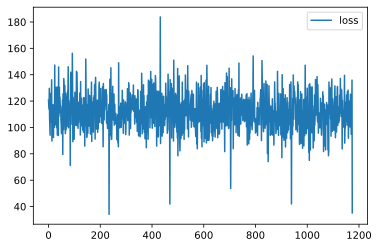

In [320]:
import matplotlib.pyplot as plt 

plt.plot(loss_dict, label='loss')
plt.legend()
plt.show()

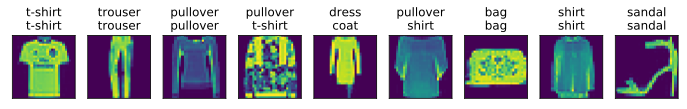

In [234]:
for X, y in test_iter:
    break

true_labels = d2l.get_fashion_mnist_labels(y.asnumpy())
pred_labels = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1).asnumpy())
titles = [true + '\n' + pred for true, pred in zip(true_labels, pred_labels)]

d2l.show_fashion_mnist(X[0:9], titles[0:9])

## 3.7 softmax 回归的简洁实现

In [0]:
X = nd.random.normal(scale=0.1, shape=(256, 1, 28, 28))
W = nd.random.normal(scale=0.1, shape=(784, 10))

In [263]:
X.shape

(256, 1, 28, 28)

In [265]:
X.reshape((-1, 784))


[[-0.15367763 -0.02658843  0.00347685 ... -0.14775227  0.06032347
  -0.10581618]
 [-0.0741702   0.09215914  0.07529796 ...  0.0099817   0.03328478
  -0.02433292]
 [ 0.08407104 -0.18633096  0.18260555 ...  0.0817024   0.16260067
  -0.1379993 ]
 ...
 [-0.00855766  0.06492941  0.08482524 ...  0.01217262  0.05963828
  -0.07540695]
 [ 0.0389862   0.09301686 -0.07027431 ...  0.11937422 -0.05759457
  -0.15308489]
 [ 0.04264173  0.04359569  0.02981248 ...  0.06753636 -0.08837589
   0.10681899]]
<NDArray 256x784 @cpu(0)>

In [266]:
W.shape

(784, 10)

In [0]:
my_net = nd.dot(X.reshape((-1, 784)), W)

In [268]:
my_net.shape

(256, 10)

In [272]:
softmax(my_net).shape

(256, 10)

In [0]:
prob = softmax(my_net)

In [271]:
prob.shape

(256, 10)

In [273]:
prob.sum(axis=1)


[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.99999994 1.         0.99999994 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.99999994 1.         1.
 1.         0.99999994 1.         1.         1.         1.
 1.         0.99999994 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.99999994 1.         1.
 1.         0.99999994 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.99999994 1.         1.         1.         0.99999994 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.99999994 1.         1.
 1.         0.99999994 1.         1.         1.        